<a href="https://colab.research.google.com/github/CesarPortales/BootCamp/blob/master/Final_DeepLearning_Keras_Cesar_Portales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a Regression Model in Keras

let's start by importing the necessary bookstores

In [0]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Get the data

Let's download the data and read it into a pandas dataframe.

In [3]:
df = pd.read_csv('https://cocl.us/concrete_data')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Dataset dimensions

In [4]:
df.shape


(1030, 9)

In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Clean the data

Let's check for Nan values

In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

**Separate the characteristics of the labels.**

In [0]:
cols = df.columns
# all columns except Strength
predictors = df[cols[cols != 'Strength']] # all columns except Strength
target = df['Strength'] # Strength column

In [8]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [9]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

**Let's calculate the number of columns**

In [0]:
n_cols = predictors.shape[1] # number of predictors

### Normalize the data

It is good practice to normalize functions that use different scales and ranges. Although the model "could" converge without feature normalization, it makes training difficult and makes the resulting model dependent on the choice of units used in the input.

In [11]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


**Quickly review the joint layout of a couple of columns from the training set.**

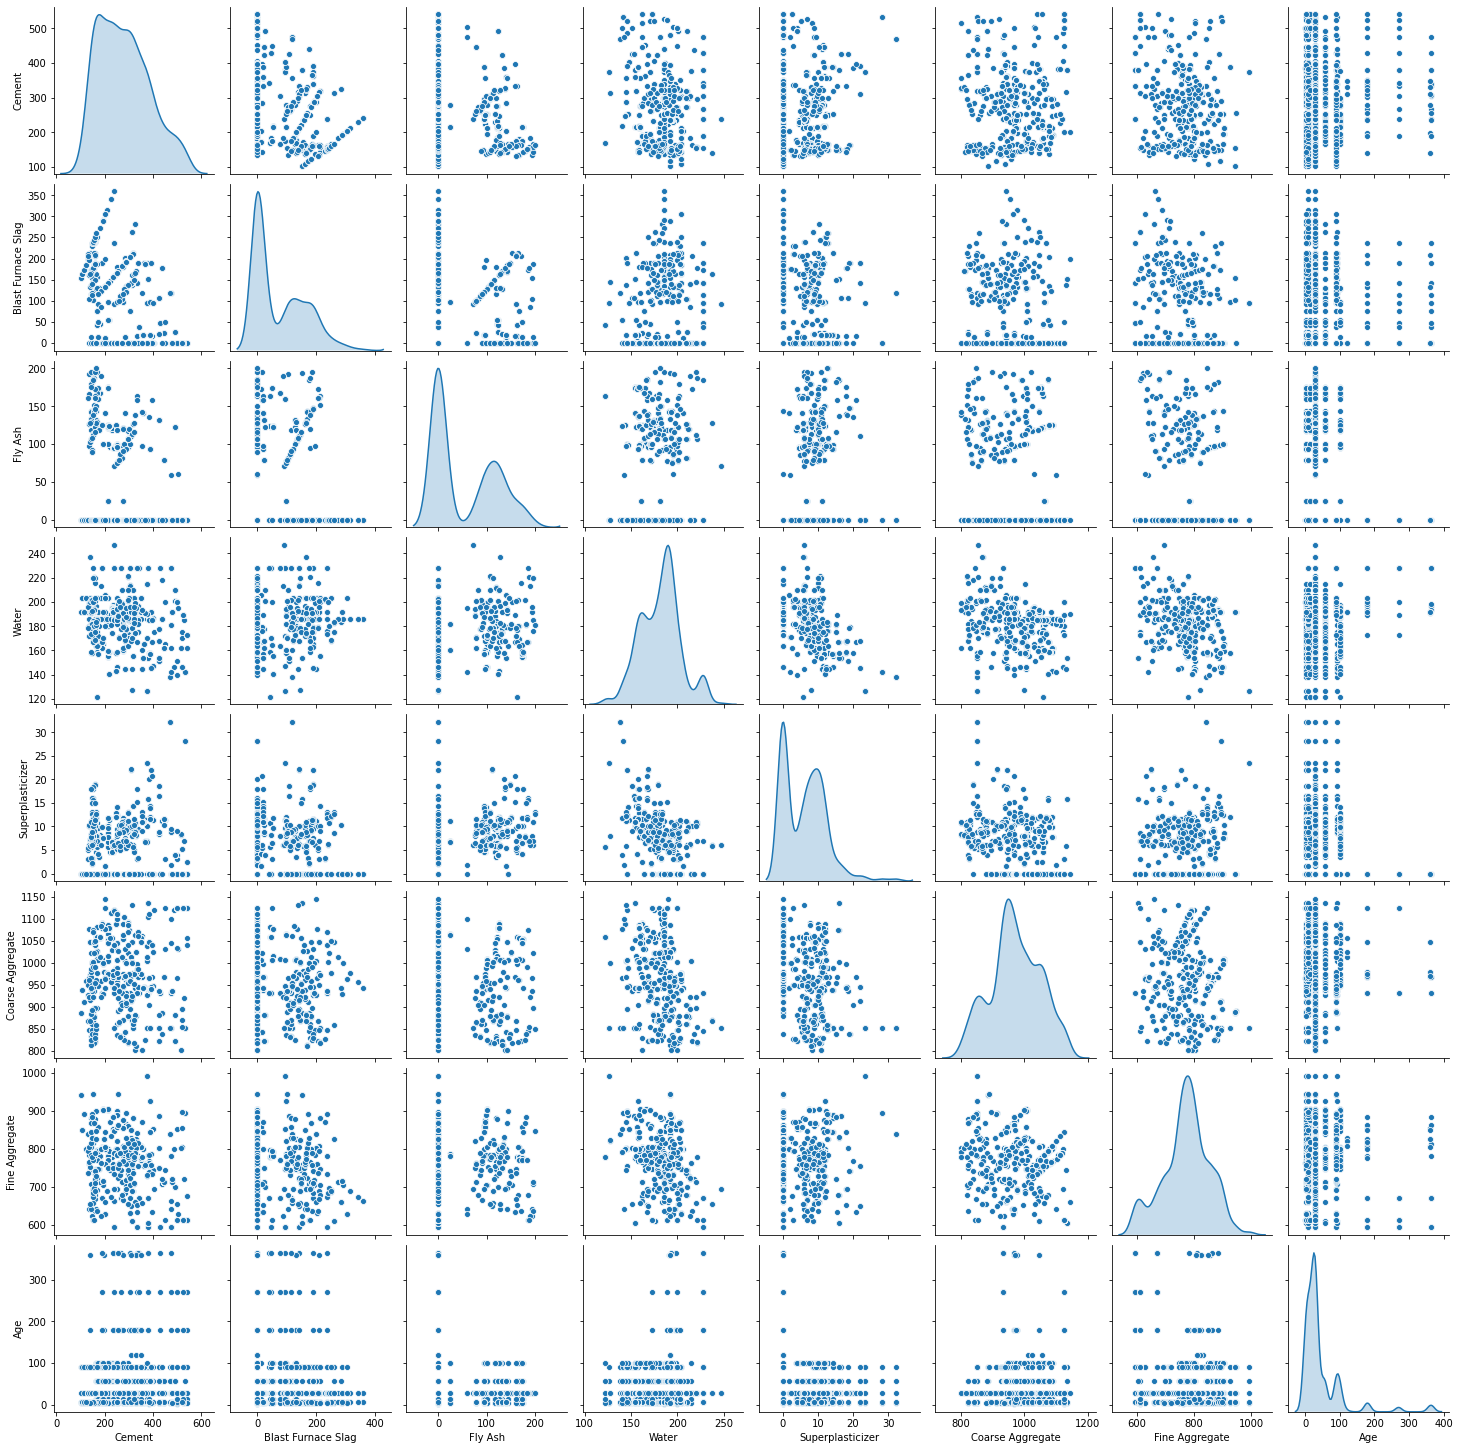

In [12]:
columns=predictors.columns.tolist()
sns.pairplot(predictors[columns], diag_kind="kde")

**At first glance it can be seen that in most of the fields there are a lot of outliers, and almost none of the values have a Gaussian distribution. The normal thing would be to do a preliminary study and do a thorough data cleaning.
But it is something that is not contemplated in the exercise.**

**Also check the general statistics:**

In [13]:
predictors.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.0,192.375,272.9,350.00,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.0,0.000,22.0,142.95,359.4
Fly Ash,1030.0,54.188350,63.997004,0.0,0.000,0.0,118.30,200.1
Water,1030.0,181.567282,21.354219,121.8,164.900,185.0,192.00,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.0,0.000,6.4,10.20,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.0,932.000,968.0,1029.40,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.0,730.950,779.5,824.00,992.6
Age,1030.0,45.662136,63.169912,1.0,7.000,28.0,56.00,365.0


## Building the model

let's import the necessary libraries

In [14]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import mse,mae

# Section A --> Predictors not normalized

**Let's create a function to define the model**

**Although the statement only asks to calculate the MSE, we will also calculate the MAE**

In [0]:
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae', 'mse'])
   
    return model

We are going to create a function that trains and evaluate the model, and gets its scores. We will save these and, in addition, we will store the history of results obtained in each epoch.

In [0]:
from sklearn.model_selection import train_test_split
def modelA(X,y,epochs,i):
    # We create a dictionary that will save the results of each iteration
    scores={} 
    # We create a list that will return the result of the function.
    #On the one hand it will save the scores obtained with the training, and on the other hand the history of results of each epoch.
    result=()
    # split the data into a training and test sets by holding 30% of the data for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)#random state is not included to get different divisions
    model = regression_model()
    
    #Use the .summary method to print a simple description of the model
    if i==1:
        print("\nSummary model{}:\n".format(i))
        model.summary()
        print("Number of epochs:",epochs)
    
    #train the model and save the results in history
    history=model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, verbose=0) #verbose 0 --not all results are shown
    
    # evbaluate the model and save the resuls in our dictionary
    loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)
    scores['loss']=loss
    scores['mae']=mae
    scores['mse']=mse
    print("\nResults of repetition", i,":",scores)
    #as a result we return a list with the final scores and the history
    #As it is something that was not requested in the exercise,
    # we will save and not to saturate the memory, we will only save the history of the last iteration.
    result=(scores,history)
    return result    
   

## Running the model 50 times
As the statement asks, we will repeat the training process fifty times

In [18]:
#We create a list to save the results of each iteration
results =[]
#We create a dataframe to save the results of the all iterations
dfA=pd.DataFrame(columns=('loss','mae','mse'))

epochs = 50

#let's call the function that create the model
            
for i in range(1,51):
    #Let's call the function that trains the model
    results=modelA(predictors,target,epochs,i)
    #We add the results to the dataframe
    dfA.loc[len(dfA)] = results[0] #index[0] --> score of each iteration
    history=results[1] # index[1] --> complete history of the last iteration



Summary model1:

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Number of epochs: 50

Results of repetition 1 : {'loss': 128.9648489350254, 'mae': 9.124954223632812, 'mse': 128.96485900878906}

Results of repetition 2 : {'loss': 1450.9458568782868, 'mae': 30.118986129760742, 'mse': 1450.94580078125}

Results of repetition 3 : {'loss': 334.5762212561944, 'mae': 14.901992797851562, 'mse': 334.57623291015625}

Results of repetition 4 : {'loss': 266.64542346942, 'mae': 13.087782859802246, 'mse': 266.6454162597656}

Results of repetition 5 : {'loss': 377.95497225

**Let's see the scores**

In [19]:
dfA.head()

,loss,mae,mse
0,128.964849,9.124954,128.964859
1,1450.945857,30.118986,1450.945801
2,334.576221,14.901993,334.576233
3,266.645423,13.087783,266.645416
4,377.954972,15.593163,377.954956


In [20]:
dfA.describe()

,loss,mae,mse
count,50.000000,50.000000,50.000000
mean,525.641736,16.390764,525.641720
std,549.975043,8.276146,549.975010
min,85.097442,7.219724,85.097443
25%,143.534796,9.438140,143.534805
50%,286.920890,13.589800,286.920898
75%,739.295470,22.065976,739.295380
max,2447.661335,38.820889,2447.661133


**We save the history in a DataFrame and show the result of the last epochs**

In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mae,val_mse,loss,mae,mse,epoch
45,107.009278,8.089201,107.009277,83.240543,7.294485,83.240547,45
46,108.251594,8.183016,108.251595,80.727925,7.169489,80.727936,46
47,109.700808,8.179343,109.700806,84.117953,7.316293,84.117950,47
48,105.101868,8.072405,105.101875,81.169608,7.155308,81.169617,48
49,101.399301,7.754303,101.399307,82.784863,7.306204,82.784874,49


Let's create charts with the evolution of MSE and MAE for each epoch

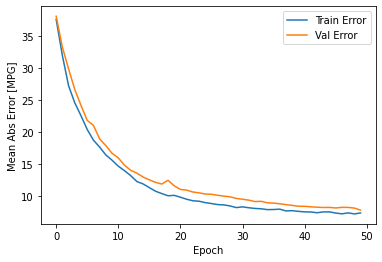

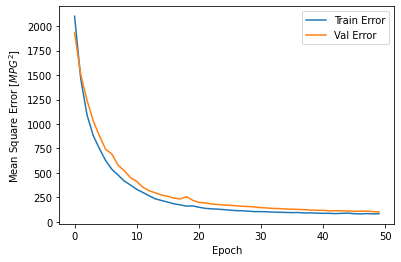

In [23]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')

  plt.legend()
  plt.show()


plot_history(history)

**Let's see the mean and standard deviation requested:**

In [24]:
#listvar=dfA['mse'].values.tolist()
mean_mse_SA=dfA['mse'].mean()
print('Mean of mse:',mean_mse_SA)
std_mse_SA = dfA['mse'].std()
print('STD of mse:',std_mse_SA)
mean_mae_SA=dfA['mae'].mean()
print('Mean of mae:',mean_mae_SA)
std_mae_SA=dfA['mae'].std()
print('STD of mae:',std_mae_SA)

Mean of mse: 525.6417198181152
STD of mse: 549.9750097465276
Mean of mae: 16.39076418876648
STD of mae: 8.2761456973884


### Conclusion

We see that the results obtained are not good (surely they would have improved by doing a thorough cleaning of the data as mentioned above, and working with a larger number of records).

The difference between the maximum and minimum data is too great.
But it is seen that the model is learning correctly, and the downward slope does not end, so surely increasing the number of epochs would obtain better results.

# Section B --> with normalized data

We use the same functions to create / train the model. We change the argument of the dataset to normalized data

In [25]:
#We create a list to save the results of each iteration
results =[]
#We create a dataframe to save the results of the three iterations
dfB=pd.DataFrame(columns=('loss','mae','mse'))

epochs = 50

#let's call the function that create the model
             
for i in range(1,51):
    #Let's call the function that trains the model
    results=modelA(predictors_norm,target,epochs,i)
    #We add the results to the dataframe
    dfB.loc[len(dfB)] = results[0] 
    history=results[1]


Summary model1:

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 10)                90        
_________________________________________________________________
dense_102 (Dense)            (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Number of epochs: 50

Results of repetition 1 : {'loss': 562.6911202341222, 'mae': 19.445297241210938, 'mse': 562.691162109375}

Results of repetition 2 : {'loss': 403.0626903151231, 'mae': 16.63182258605957, 'mse': 403.0627136230469}

Results of repetition 3 : {'loss': 383.9044986465602, 'mae': 15.823502540588379, 'mse': 383.9045104980469}

Results of repetition 4 : {'loss': 620.4481029325318, 'mae': 20.344053268432617, 'mse': 620.447998046875}

Results of repetition 5 : {'loss': 428.676025588

**Let's see the scores**

In [26]:
dfB.head()

,loss,mae,mse
0,562.691120,19.445297,562.691162
1,403.062690,16.631823,403.062714
2,383.904499,15.823503,383.904510
3,620.448103,20.344053,620.447998
4,428.676026,17.173784,428.676025


In [27]:
dfB.describe()

,loss,mae,mse
count,50.000000,50.000000,50.000000
mean,558.572426,19.594261,558.572421
std,124.236358,2.596501,124.236355
min,353.818851,15.042109,353.818878
25%,460.787120,17.459448,460.787125
50%,560.996562,19.612331,560.996582
75%,636.856025,20.964711,636.856049
max,852.038449,25.446285,852.038513


**We save the history of the last repetition in a dataframe and create charts to show evolution of MSE and MAE**

In [28]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mae,val_mse,loss,mae,mse,epoch
45,538.937789,19.946083,538.937805,438.282527,17.659658,438.282562,45
46,521.627345,19.564724,521.627380,423.190813,17.318796,423.190796,46
47,505.176123,19.214493,505.176117,408.708772,16.984434,408.708740,47
48,489.290735,18.870924,489.290741,395.149831,16.664396,395.149841,48
49,474.705469,18.545033,474.705444,382.032360,16.364147,382.032349,49


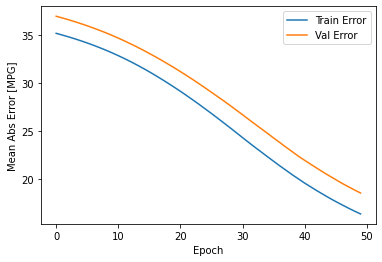

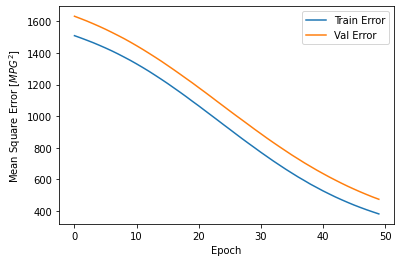

In [29]:
plot_history(history)

**Let's see the mean and standard deviation requested:**

In [30]:
#listvar=dfA['mse'].values.tolist()
mean_mse_SB=dfB['mse'].mean()
print('Mean of mse:',mean_mse_SB)
std_mse_SB = dfB['mse'].std()
print('STD of mse:',std_mse_SB)
mean_mae_SB=dfB['mae'].mean()
print('Mean of mae:',mean_mae_SB)
std_mae_SB=dfB['mae'].std()
print('STD of mae:',std_mae_SB)

Mean of mse: 558.5724212646485
STD of mse: 124.23635507876037
Mean of mae: 19.594260578155517
STD of mae: 2.596501301670454


### We compare the results with those of section A

In [31]:
print("\nWe compare the results of Sections A and B\n")
print('Mean of mse (Section B):',mean_mse_SB)
print('Mean of mse (Section A):',mean_mse_SA)
dif_meanBA=mean_mse_SB-mean_mse_SA
if dif_meanBA>0:
    print("The results of the mean MSE with the normalized data is greater, with the difference of",dif_meanBA)
else:
     print("The results of the mean MSE with the normalized data is less, with the difference of",dif_meanBA)

print('\nSTD of mse (Section B):',std_mse_SB)
print('STD of mse (Section A):',std_mse_SA)

dif_StdBA=std_mse_SB-std_mse_SA
if (dif_StdBA>0):
    print("The results of the std MSE with the normalized data is greater, with the difference of",dif_StdBA)
else:
     print("The results of the std MSE with the normalized data is less, with the difference of",dif_StdBA)
        
print('\nMean of mae (Section B):',mean_mae_SB)
print('Mean of mae (Section A):',mean_mae_SA)
dif_mean_mae_BA=mean_mae_SB-mean_mae_SA
if (dif_mean_mae_BA>0):
    print('The results of the mean MAE with the normalized data is greater, with the difference of',dif_mean_mae_BA)
else:
     print("The results of the mean MAE with the normalized data is less, with the difference of",dif_mean_mae_BA)        
        
        
print('\nSTD of mae (Section B):',std_mae_SB)
print('STD of mae (Section A):',std_mae_SA)

dif_Std_mae_BA=std_mae_SB-std_mae_SA
if (dif_Std_mae_BA>0):
    print("The results of the std MAE with the normalized data is greater, with the difference of",dif_Std_mae_BA)
else:
     print("The results of the std MAE with the normalized data is less, with the difference of",dif_Std_mae_BA)




We compare the results of Sections A and B

Mean of mse (Section B): 558.5724212646485
Mean of mse (Section A): 525.6417198181152
The results of the mean MSE with the normalized data is greater, with the difference of 32.93070144653325

STD of mse (Section B): 124.23635507876037
STD of mse (Section A): 549.9750097465276
The results of the std MSE with the normalized data is less, with the difference of -425.7386546677672

Mean of mae (Section B): 19.594260578155517
Mean of mae (Section A): 16.39076418876648
The results of the mean MAE with the normalized data is greater, with the difference of 3.203496389389038

STD of mae (Section B): 2.596501301670454
STD of mae (Section A): 8.2761456973884
The results of the std MAE with the normalized data is less, with the difference of -5.679644395717945


### Conclusion

As expected, the maximum error has been much less.

The mean of the error has been slightly higher, possibly due to the fact that the slope of the error decrease, as the data is normalized, is much less pronounced.

As expected, the standard deviation is smaller when working with normalized data.

It is seen more clearly than in the previous case that the model (which continues with a downward trend) would give better results with a greater number of epochs.

# Section C --> 100 epochs

We use the same functions to create / train the model. We change the argument of the dataset to normalized data, and epochs = 100

In [32]:
#We create a list to save the results of each iteration
results =[]
#We create a dataframe to save the results of the three iterations
dfC=pd.DataFrame(columns=('loss','mae','mse'))

epochs = 100

#let's call the function that create the model
           
for i in range(1,51):
    #Let's call the function that trains the model
    results=modelA(predictors_norm,target,epochs,i)
    #We add the results to the dataframe
    dfC.loc[len(dfC)] = results[0]
    history=results[1]


Summary model1:

Model: "sequential_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_201 (Dense)            (None, 10)                90        
_________________________________________________________________
dense_202 (Dense)            (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Number of epochs: 100

Results of repetition 1 : {'loss': 218.74273128571247, 'mae': 12.042426109313965, 'mse': 218.74273681640625}

Results of repetition 2 : {'loss': 238.9886702256681, 'mae': 12.643072128295898, 'mse': 238.98867797851562}

Results of repetition 3 : {'loss': 160.7337594387215, 'mae': 10.202192306518555, 'mse': 160.7337646484375}

Results of repetition 4 : {'loss': 174.8035687196602, 'mae': 10.348204612731934, 'mse': 174.80357360839844}

Results of repetition 5 : {'loss': 170.

**Let's see the socres**

In [33]:
dfC.head()

,loss,mae,mse
0,218.742731,12.042426,218.742737
1,238.988670,12.643072,238.988678
2,160.733759,10.202192,160.733765
3,174.803569,10.348205,174.803574
4,170.304769,10.568274,170.304764


In [34]:
dfC.describe()

,loss,mae,mse
count,50.000000,50.000000,50.000000
mean,211.163932,11.642110,211.163935
std,67.879685,1.687366,67.879684
min,156.440226,10.069245,156.440201
25%,174.812854,10.674619,174.812859
50%,197.838116,11.321631,197.838112
75%,218.687420,11.866614,218.687424
max,564.176481,19.424873,564.176453


**We save the history of the last repetition in a dataframe and create charts to show evolution of MSE and MAE**

In [35]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mae,val_mse,loss,mae,mse,epoch
95,261.734307,13.149389,261.734314,204.695793,11.310207,204.695801,95
96,259.325797,13.096961,259.325806,202.584736,11.261304,202.584747,96
97,256.963731,13.043479,256.963745,200.594171,11.214479,200.594162,97
98,254.868450,12.993412,254.868454,198.573198,11.166487,198.573196,98
99,252.651921,12.946903,252.651917,196.831256,11.124240,196.831253,99


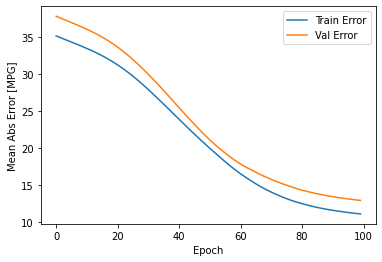

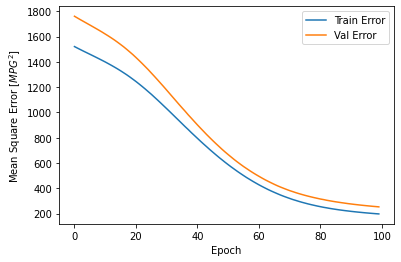

In [36]:
plot_history(history)

**Let's see the mean and standard deviation requested:**

In [37]:
#listvar=dfA['mse'].values.tolist()
mean_mse_SC=dfC['mse'].mean()
print('Mean of mse:',mean_mse_SC)
std_mse_SC = dfC['mse'].std()
print('STD of mse:',std_mse_SC)
mean_mae_SC=dfC['mae'].mean()
print('Mean of mae:',mean_mae_SC)
std_mae_SC=dfC['mae'].std()
print('STD of mae:',std_mae_SC)

Mean of mse: 211.16393524169922
STD of mse: 67.87968423103273
Mean of mae: 11.642109851837159
STD of mae: 1.687365631603039


### We compare the results with those of section B

In [38]:
print("\nWe compare the results of Sections B and C\n")
print('Mean of mse (Section C):',mean_mse_SC)
print('Mean of mse (Section B):',mean_mse_SB)
dif_meanCB=mean_mse_SC-mean_mse_SB
if (dif_meanCB>0):
    print("The results of the mean MSE with 100 Epochs is greater, with the difference of",dif_meanCB)
else:
     print("The results of the mean MSE with 100 Epochs is less, with the difference of",dif_meanCB)

print('\nSTD of mse (Section C):',std_mse_SC)
print('STD of mse (Section B):',std_mse_SB)

dif_StdCB=std_mse_SC-std_mse_SB
if (dif_StdCB>0):
    print("The results of the std MSE with 100 Epochs is greater, with the difference of",dif_StdCB)
else:
     print("The results of the std MSE with 100 Epochs is less, with the difference of",dif_StdCB)
        
print('\nMean of mae (Section C):',mean_mae_SC)
print('Mean of mae (Section B):',mean_mae_SB)
dif_mean_mae_CB=mean_mae_SC-mean_mae_SB
if (dif_mean_mae_CB>0):
    print("The results of the mean MAE with 100 Epochs is greater, with the difference of",dif_mean_mae_CB)
else:
     print("The results of the mean MAE with 100 Epochs is less, with the difference of",dif_mean_mae_CB)        
        
        
print('\nSTD of mae (Section C):',std_mae_SC)
print('STD of mae (Section B):',std_mae_SB)

dif_Std_mae_CB=std_mae_SC-std_mae_SB
if (dif_Std_mae_CB>0):
    print("The results of the std MAE with 100 Epochs is greater, with the difference of",dif_Std_mae_CB)
else:
     print("The results of the std MAE with 100 Epochs is less, with the difference of",dif_Std_mae_CB)




We compare the results of Sections B and C

Mean of mse (Section C): 211.16393524169922
Mean of mse (Section B): 558.5724212646485
The results of the mean MSE with 100 Epochs is less, with the difference of -347.40848602294926

STD of mse (Section C): 67.87968423103273
STD of mse (Section B): 124.23635507876037
The results of the std MSE with 100 Epochs is less, with the difference of -56.35667084772764

Mean of mae (Section C): 11.642109851837159
Mean of mae (Section B): 19.594260578155517
The results of the mean MAE with 100 Epochs is less, with the difference of -7.952150726318358

STD of mae (Section C): 1.687365631603039
STD of mae (Section B): 2.596501301670454
The results of the std MAE with 100 Epochs is less, with the difference of -0.9091356700674149


### Conclusion

As previously anticipated, as the number of epochs increases, the results improve markedly.

It even seems that they would improve even more with a greater number.

It is curious that in this case a higher MSE was obtained in the validation data than in the training data (we continue to insist that this would improve if a previous cleaning had been done and a greater number of data were available.

# Section D --> Three hidden layers

We are going to write new functions to create the model with the new features

In [0]:
def regression_modelD():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae', 'mse'])
   
    return model

In [0]:
def modelD(X,y,epochs,i):
    # We create a dictionary that will save the results of each iteration
    scores={} 
    result=()
    # split the data into a training and test sets by holding 30% of the data for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)#random state is not included to get different divisions
    model = regression_modelD()
    
    #Use the .summary method to print a simple description of the model
    if i==1:
        print("\nSummary model{}:\n".format(i))
        model.summary()
        print("num. of epochs:",epochs)
    
    #train the model
    history=model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, verbose=0)
    
    # evbaluate the model and save the resuls in our dictionary
    loss, mae, mse = model.evaluate(X_test, y_test, verbose=0)
    scores['loss']=loss
    scores['mae']=mae
    scores['mse']=mse
    print("\nResults of repetition", i,":",scores)
    result=(scores,history)
    return result

Let's try the new model

In [41]:
#We create a list to save the results of each iteration
results =[]

#We create a dataframe to save the results of the three iterations
dfD=pd.DataFrame(columns=('loss','mae','mse'))

epochs = 50

#let's call the function that create the model
             
for i in range(1,51):
    #Let's call the function that trains the model
    results=modelD(predictors_norm,target,epochs,i)
    #We add the results to the dataframe
    dfD.loc[len(dfD)] = results[0] 
    history=results[1]


Summary model1:

Model: "sequential_151"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_301 (Dense)            (None, 10)                90        
_________________________________________________________________
dense_302 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_303 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_304 (Dense)            (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
num. of epochs: 50

Results of repetition 1 : {'loss': 163.264481529063, 'mae': 10.062949180603027, 'mse': 163.2644805908203}

Results of repetition 2 : {'loss': 99.53166137003976, 'mae': 8.171382904052734, 'mse': 99.53166198730469}



**Let's show the scores**

In [42]:
dfD.head()

,loss,mae,mse
0,163.264482,10.062949,163.264481
1,99.531661,8.171383,99.531662
2,162.725761,10.154291,162.725754
3,132.723615,9.020182,132.723602
4,137.186549,9.421889,137.186554


In [43]:
dfD.describe()

,loss,mae,mse
count,50.000000,50.000000,50.000000
mean,141.136536,9.576733,141.136535
std,15.290636,0.573518,15.290636
min,99.531661,8.171383,99.531662
25%,132.023577,9.184427,132.023571
50%,142.866760,9.676000,142.866760
75%,150.732841,9.980692,150.732853
max,174.834229,10.756975,174.834213


**We save the history of the last repetition in a dataframe and create charts to show evolution of MSE and MAE**

In [44]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mae,val_mse,loss,mae,mse,epoch
45,146.826689,9.578836,146.826691,151.372028,10.215319,151.372025,45
46,147.384330,9.561503,147.384338,149.688944,10.175759,149.688950,46
47,146.351636,9.538685,146.351624,148.572108,10.116123,148.572083,47
48,145.679917,9.526071,145.679916,148.481723,10.104290,148.481720,48
49,146.068797,9.517788,146.068802,147.034342,10.058984,147.034348,49


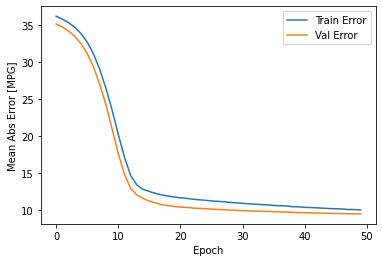

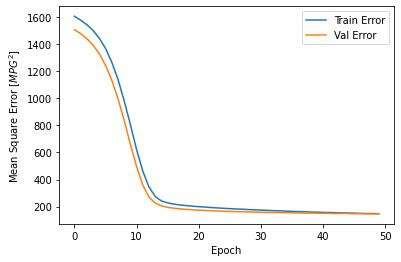

In [45]:
plot_history(history)

**Let's see the mean and standard deviation requested:**

In [46]:
mean_mse_SD=dfD['mse'].mean()
print('Mean of mse:',mean_mse_SD)
std_mse_SD = dfD['mse'].std()
print('STD of mse:',std_mse_SD)
mean_mae_SD=dfD['mae'].mean()
print('Mean of mae:',mean_mae_SD)
std_mae_SD=dfD['mae'].std()
print('STD of mae:',std_mae_SD)

Mean of mse: 141.13653488159179
STD of mse: 15.290636065924794
Mean of mae: 9.576733226776122
STD of mae: 0.5735177662030521


### We compare the results with those of section B

In [47]:
print("\nWe compare the results of Sections D and B\n")
print('Mean of mse (Section D):',mean_mse_SD)
print('Mean of mse (Section B):',mean_mse_SB)
dif_meanDB=mean_mse_SD-mean_mse_SB
if (dif_meanDB>0):
    print("The results of the mean MSE with three hidden layers is greater, with the difference of",dif_meanDB)
else:
     print("The results of the mean MSE with three hidden layers is less, with the difference of",dif_meanDB)

print('\nSTD of mse (Section D):',std_mse_SD)
print('STD of mse (Section B):',std_mse_SB)

dif_StdDB=std_mse_SD-std_mse_SB
if (dif_StdDB>0):
    print("The results of the std MSE with three hidden layers is greater, with the difference of",dif_StdDB)
else:
     print("The results of the std MSE with three hidden layers is less, with the difference of",dif_StdDB)
        
print('\nMean of mae (Section D):',mean_mae_SD)
print('Mean of mae (Section B):',mean_mae_SB)
dif_mean_mae_DB=mean_mae_SD-mean_mae_SB
if (dif_mean_mae_DB>0):
    print("The results of the mean MAE with three hidden layers is greater, with the difference of",dif_mean_mae_DB)
else:
     print("The results of the mean MAE with three hidden layers is less, with the difference of",dif_mean_mae_DB)        
        
        
print('\nSTD of mae (Section D):',std_mae_SD)
print('STD of mae (Section B):',std_mae_SB)

dif_Std_mae_DB=std_mae_SD-std_mae_SB
if (dif_Std_mae_DB>0):
    print("The results of the std MAE with three hidden layers is greater, with the difference of",dif_Std_mae_DB)
else:
     print("The results of the std MAE with three hidden layers is less, with the difference of",dif_Std_mae_DB)


We compare the results of Sections D and B

Mean of mse (Section D): 141.13653488159179
Mean of mse (Section B): 558.5724212646485
The results of the mean MSE with three hidden layers is less, with the difference of -417.4358863830567

STD of mse (Section D): 15.290636065924794
STD of mse (Section B): 124.23635507876037
The results of the std MSE with three hidden layers is less, with the difference of -108.94571901283558

Mean of mae (Section D): 9.576733226776122
Mean of mae (Section B): 19.594260578155517
The results of the mean MAE with three hidden layers is less, with the difference of -10.017527351379394

STD of mae (Section D): 0.5735177662030521
STD of mae (Section B): 2.596501301670454
The results of the std MAE with three hidden layers is less, with the difference of -2.022983535467402


### Conclusion

As expected, by adding more layers the results have improved significantly in all sections.

The learning slope has been improved, and regarding the MSE, the validation and training results have been much closer.

# Section E (additional) --> three layers + control epochs (Early Stopping)

In the results obtained with the previous models, it can be seen that the scores do not stop improving as the number of epochs increases. Let's see what results would be obtained by increasing this value.
Let's update the model.fit call to automatically stop training when the validation score doesn't improve. We will use an "EarlyStopping"callback that tests a training condition for each epoch. If a certain number of times elapse without showing improvement (10 y our example), then it automatically stops the training.

We will put an "exaggerated" number of epochs (1000) taking into account that "Early stopping" is not going to allow reaching this value.

In [0]:
def modelE(X,y,epochs,i):
    # We create a dictionary that will save the results of each iteration
    scores={} 
    result=()
    # split the data into a training and test sets by holding 30% of the data for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)#random state is not included to get different divisions
    model = regression_modelD()
    # The patience parameter is the amount of epochs to check for improvement
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    if i==1:
        #Use the .summary method to print a simple description of the model
        print("\nSummary model{}:\n".format(i))
        print("Number of epochs:",epochs)
        model.summary()
    
    #train the model
    history=model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, verbose=0,callbacks=[early_stop])
    
    # evbaluate the model and save the resuls in our dictionary
    loss, mae, mse = model.evaluate(X_test, y_test, verbose=0)
    scores['loss']=loss
    scores['mae']=mae
    scores['mse']=mse
    print("\nResults of repetition", i,":",scores)
    result=(scores,history)
    return result

In [49]:
#We create a list to save the results of each iteration
results =[]

#We create a dataframe to save the results of the three iterations
dfE=pd.DataFrame(columns=('loss','mae','mse'))

epochs = 1000

#let's call the function that create the model
             
for i in range(1,51):
    #Let's call the function that trains the model
    results=modelE(predictors_norm,target,epochs,i)
    #We add the results to the dataframe
    dfE.loc[len(dfE)] = results[0] 
    history=results[1]


Summary model1:

Number of epochs: 1000
Model: "sequential_201"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_501 (Dense)            (None, 10)                90        
_________________________________________________________________
dense_502 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_503 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_504 (Dense)            (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________

Results of repetition 1 : {'loss': 59.898349613819306, 'mae': 5.860507011413574, 'mse': 59.89834976196289}

Results of repetition 2 : {'loss': 44.115427103629, 'mae': 5.0650434494018555, 'mse': 44.1154251098632

**Let's show the scores**

In [50]:
dfE.head()

,loss,mae,mse
0,59.898350,5.860507,59.898350
1,44.115427,5.065043,44.115425
2,157.537358,9.862195,157.537369
3,47.730611,5.116055,47.730610
4,104.880017,8.258016,104.880013


In [51]:
dfE.describe()

,loss,mae,mse
count,50.000000,50.000000,50.000000
mean,53.819757,5.537403,53.819758
std,23.254242,1.129569,23.254243
min,36.959988,4.510585,36.959988
25%,42.632945,4.991159,42.632949
50%,46.995083,5.150204,46.995085
75%,51.287676,5.552437,51.287674
max,157.537358,9.862195,157.537369


**We save the history of the last repetition in a dataframe and create charts to show evolution of MSE and MAE**

In [52]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(20)

,val_loss,val_mae,val_mse,loss,mae,mse,epoch
365,39.486380,5.027176,39.486378,32.192353,4.483007,32.192352,365
366,38.601742,4.990983,38.601742,31.924586,4.455031,31.924587,366
367,37.884214,4.990046,37.884216,31.605438,4.420807,31.605438,367
368,38.288341,4.986499,38.288342,31.559390,4.429054,31.559391,368
369,37.955773,5.004293,37.955772,31.649377,4.426517,31.649374,369
370,38.049969,5.001674,38.049965,31.367127,4.407801,31.367130,370
371,37.944404,4.971150,37.944405,31.388497,4.417865,31.388498,371
372,40.860330,5.037969,40.860329,31.843650,4.456697,31.843651,372
373,38.874756,5.015543,38.874756,32.175057,4.466763,32.175060,373
374,37.652856,4.924883,37.652855,31.371780,4.414564,31.371778,374


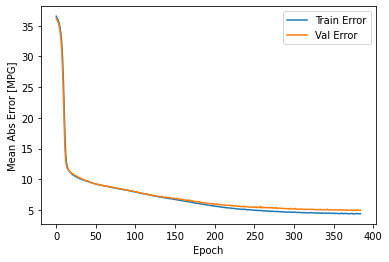

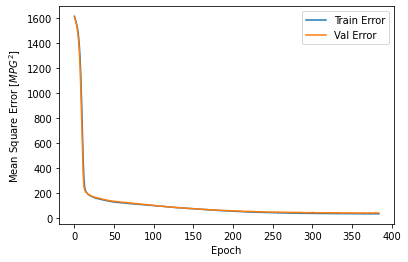

In [53]:
plot_history(history)

**Let's see the mean and standard deviation requested:**

In [54]:
mean_mse_SE=dfE['mse'].mean()
print('Mean of mse:',mean_mse_SE)
std_mse_SE = dfE['mse'].std()
print('STD of mse:',std_mse_SE)
mean_mae_SE=dfE['mae'].mean()
print('Mean of mae:',mean_mae_SE)
std_mae_SE=dfE['mae'].std()
print('STD of mae:',std_mae_SE)

Mean of mse: 53.819758071899415
STD of mse: 23.254242826084344
Mean of mae: 5.537402791976929
STD of mae: 1.1295687290396523


### We compare the results with those of section C (the best)

In [55]:
print("\nWe compare the results of Sections E and C\n")
print('Mean of mse (Section E):',mean_mse_SE)
print('Mean of mse (Section B):',mean_mse_SC)
dif_meanEC=mean_mse_SE-mean_mse_SC
if (dif_meanEC>0):
    print("The results of the mean MSE with optimized epochs is greater, with the difference of",dif_meanEC)
else:
     print("The results of the mean MSE with optimized epochs is less, with the difference of",dif_meanEC)

print('\nSTD of mse (Section E):',std_mse_SE)
print('STD of mse (Section B):',std_mse_SC)

dif_StdEC=std_mse_SE-std_mse_SC
if (dif_StdEC>0):
    print("The results of the std MSE with optimized epochs is greater, with the difference of",dif_StdEC)
else:
     print("The results of the std MSE with optimized epochs is less, with the difference of",dif_StdEC)
        
print('\nMean of mae (Section E):',mean_mae_SE)
print('Mean of mae (Section B):',mean_mae_SC)
dif_mean_mae_EC=mean_mae_SE-mean_mae_SC
if (dif_mean_mae_EC>0):
    print("The results of the mean MAE with optimized epochs is greater, with the difference of",dif_mean_mae_EC)
else:
     print("The results of the mean MAE with optimized epochs is less, with the difference of",dif_mean_mae_EC)        
        
        
print('\nSTD of mae (Section E):',std_mae_SE)
print('STD of mae (Section B):',std_mae_SC)

dif_Std_mae_EC=std_mae_SE-std_mae_SC
if (dif_Std_mae_EC>0):
    print("The results of the std MAE with optimized epochs is greater, with the difference of",dif_Std_mae_EC)
else:
     print("The results of the std MAE with optimized epochs is less, with the difference of",dif_Std_mae_EC)



We compare the results of Sections E and C

Mean of mse (Section E): 53.819758071899415
Mean of mse (Section B): 211.16393524169922
The results of the mean MSE with optimized epochs is less, with the difference of -157.34417716979982

STD of mse (Section E): 23.254242826084344
STD of mse (Section B): 67.87968423103273
The results of the std MSE with optimized epochs is less, with the difference of -44.62544140494838

Mean of mae (Section E): 5.537402791976929
Mean of mae (Section B): 11.642109851837159
The results of the mean MAE with optimized epochs is less, with the difference of -6.10470705986023

STD of mae (Section E): 1.1295687290396523
STD of mae (Section B): 1.687365631603039
The results of the std MAE with optimized epochs is less, with the difference of -0.5577969025633867


### Conclusion

The best results are obtained by far (both for the mean and for the standard deviation in the cases of MSE and MAE).

The training and validation results are almost coincident (note, there is a risk of overfitting).

Several tests have been carried out, and in no case has it exceeded 415 epochs (in the last test, which is the one shown, there are 385).